In [71]:
import torchvision
from xy_dataset import XYDataset


transform = torchvision.transforms.Compose([
    torchvision.transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


dataset = XYDataset('apex_dataset', transform=transform, random_hflip=True)

In [72]:
import torch

loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=16,
    shuffle=True
)

In [81]:
from heatmap import HeatmapModel, generate_heatmap

model = HeatmapModel(1, [128, 128])
device = torch.device('cuda')
model = model.to(device)

In [82]:
optimizer = torch.optim.Adam(model.parameters())

In [83]:
import torch.nn.functional as F

EPOCHS = 30

for epoch in range(EPOCHS):
    
    epoch_loss = 0.0
    
    for image, xy in iter(loader):
        heatmap = generate_heatmap(xy, 0.1, (28, 28))
        image = image.to(device)
        heatmap = heatmap.to(device)
        
        optimizer.zero_grad()
        
        heatmap_out = model(image)
        
        loss = F.mse_loss(heatmap_out, heatmap)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss
        
    epoch_loss /= len(loader)
    
    print('%d: %f' % (epoch, epoch_loss))

0: 0.032629
1: 0.003361
2: 0.003103
3: 0.002631
4: 0.002194
5: 0.001889
6: 0.001624
7: 0.001446
8: 0.001228
9: 0.001135
10: 0.001005
11: 0.000933
12: 0.000834
13: 0.000759
14: 0.000708
15: 0.000657
16: 0.000571
17: 0.000549
18: 0.000511
19: 0.000521
20: 0.000453
21: 0.000414
22: 0.000415
23: 0.000343
24: 0.000335
25: 0.000310
26: 0.000294
27: 0.000293
28: 0.000261
29: 0.000270


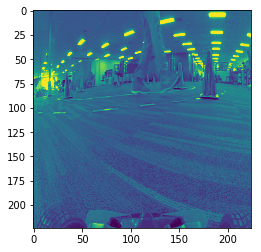

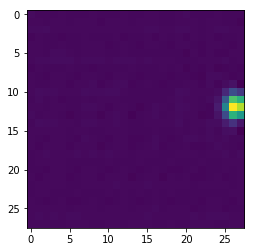

In [88]:
plt.imshow(image.cpu().numpy()[1, 0])
plt.show()
plt.imshow(heatmap_out.detach().cpu().numpy()[1, 0])
plt.show()